# 线性回归

## 基于Numpy的代码实现

In [1]:
import numpy as np

### 模型主体

In [2]:
### 模型主体包括回归模型公式、均方损失函数和参数求偏导三部分
def linear_loss(X, y, w, b):
    """
    输入:
    X: 输入变量矩阵
    y: 输出标签向量
    w: 变量参数权重矩阵
    b: 偏置
    输出:
    y_hat: 线性回归模型预测值
    loss: 均方损失
    dw: 权重系数一阶偏导
    db: 偏置一阶偏导
    """
    # 训练样本量
    num_train = X.shape[0]
    # 线性回归预测值
    y_hat = np.dot(X, w) + b
    # 计算预测值与实际标签之间的均方损失
    loss = np.sum((y_hat - y) ** 2) / num_train
    # 基于均方损失对权重系数的一阶梯度
    dw = 2 * np.dot(X.T, y_hat - y) / num_train
    # 基于均方损失对偏置的一阶梯度
    db = 2 * np.sum(y_hat - y) / num_train
    return y_hat, loss, dw, db

### 训练过程

In [3]:
### 模型参数初始化
def initialize_params(dims):
    """
    输入:
    dims: 训练数据的变量维度
    输出:
    w: 初始化权重参数
    b: 初始化偏置参数
    """
    # 初始化权重系数为零向量
    w = np.zeros((dims, 1))
    # 初始化偏置系数为零
    b = 0
    return w, b

In [4]:
### 多轮训练迭代过程和梯度下降的参数优化更新
def linear_train(X, y, learning_rate=0.01, epochs=10000):
    """
    输入:
    X: 输入变量矩阵
    y: 输出标签向量
    learning_rate: 学习率
    epoch: 训练迭代次数
    输出:
    loss_his: 每次迭代的均方损失
    params: 优化后的参数字典
    grads: 优化后的参数梯度字典
    """
    # 记录训练损失的空列表
    loss_his = []
    # 初始化模型参数
    w, b = initialize_params(X.shape[1])
    # 迭代过程
    for i in range(1, epochs):
        # 计算当前迭代的预测值、均方损失和梯度
        y_hat, loss, dw, db = linear_loss(X, y, w, b)
        # 基于梯度下降法的参数更新
        w -= learning_rate * dw
        b -= learning_rate * db
        # 记录当前迭代的损失
        loss_his.append(loss)
        # 每10000次迭代打印当前损失信息
        if i % 10000 == 0:
            print('epoch %d loss %f' % (i, loss))
        # 将当前迭代步优化后的参数保存到字典中
        params = {
            'w': w,
            'b': b
        }
        # 将当前迭代步的梯度保存到字典中
        grads = {
            'dw': dw,
            'db': db
        }
    return loss_his, params, grads

### 预测过程

In [11]:
### 模型预测函数
def predict(X, params):
    """
    输入:
    X: 测试集
    params: 模型训练参数
    输出:
    y_pred: 模型预测结果
    """
    # 获取模型参数
    w, b = params['w'], params['b']
    # 预测
    y_pred = np.dot(X, w) + b
    return y_pred

In [12]:
### 回归评估指标R^2系数计算
def r2_score(y_test, y_pred):
    """
    输入:
    y_test: 测试集标签值
    y_pred: 测试集预测值
    输出:
    r2: R^2系数
    """
    # 测试集标签均值
    y_avg = np.mean(y_test)
    # 总离差平方和
    ss_tot = np.sum((y_test - y_avg) ** 2)
    # 残差平方和
    ss_res = np.sum((y_test - y_pred) ** 2)
    # R^2计算
    r2 = 1 - ss_res / ss_tot
    return r2

### 模型测试

In [7]:
from sklearn.datasets import load_diabetes
from sklearn.utils import shuffle

In [8]:
diabetes = load_diabetes()
data, target = diabetes.data, diabetes.target
print(data.shape)
print(target.shape)
print(data[:5])
print(target[:5])

(442, 10)
(442,)
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]
[151.  75. 141. 206. 135.]


In [9]:
# 打乱数据集
X, y = shuffle(data, target, random_state=13)
# 按照8/2划分训练集和测试集
offset = int(X.shape[0] * 0.8)
# 训练集
X_train, y_train = X[:offset], y[:offset]
# 测试集
X_test, y_test = X[offset:], y[offset:]
# 将训练集和测试集（验证集）的标签改为列向量的形式
y_train, y_test = y_train.reshape((-1,1)), y_test.reshape((-1,1))
# 打印训练集和测试集维度
print("X_train's shape: ", X_train.shape)
print("X_test's shape: ", X_test.shape)
print("y_train's shape: ", y_train.shape)
print("y_test's shape: ", y_test.shape)

X_train's shape:  (353, 10)
X_test's shape:  (89, 10)
y_train's shape:  (353, 1)
y_test's shape:  (89, 1)


In [10]:
# 线性回归模型训练
loss_his, params, grads = linear_train(X_train, y_train, 0.01, 200000)
# 打印训练后得到模型参数
print(params)

epoch 10000 loss 3219.178670
epoch 20000 loss 2944.940452
epoch 30000 loss 2848.052938
epoch 40000 loss 2806.628090
epoch 50000 loss 2788.051589
epoch 60000 loss 2779.411239
epoch 70000 loss 2775.230777
epoch 80000 loss 2773.107175
epoch 90000 loss 2771.957481
epoch 100000 loss 2771.281723
epoch 110000 loss 2770.843500
epoch 120000 loss 2770.528226
epoch 130000 loss 2770.278899
epoch 140000 loss 2770.066388
epoch 150000 loss 2769.875394
epoch 160000 loss 2769.697658
epoch 170000 loss 2769.528602
epoch 180000 loss 2769.365613
epoch 190000 loss 2769.207165
{'w': array([[   9.84972769],
       [-240.38803204],
       [ 491.45462983],
       [ 298.20492926],
       [ -87.77291402],
       [ -98.36201742],
       [-186.17374049],
       [ 177.38726503],
       [ 424.17405761],
       [  52.48952427]]), 'b': 150.8136201371859}


In [23]:
import matplotlib.pyplot as plt

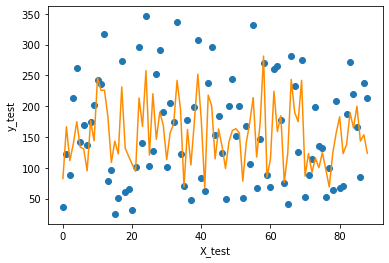

In [24]:
# 可视化展示测试集拟合效果
f = X_test.dot(params['w']) + params['b']
plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color = 'darkorange')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.show()

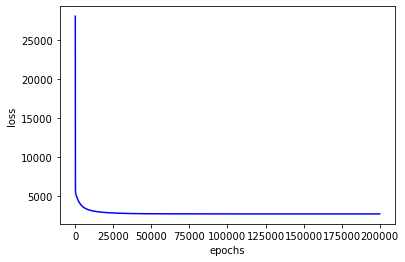

In [25]:
# 训练中的均方损失下降过程
plt.plot(loss_his, color = 'blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [15]:
# 基于测试集的预测
y_pred = predict(X_test, params)
# 打印前五个预测值
y_pred[:5]

[[ 82.59623749]
 [166.68562999]
 [111.5984967 ]
 [139.20861987]
 [174.84305146]] [[ 37.]
 [122.]
 [ 88.]
 [214.]
 [262.]]


In [16]:
print(y_test[:5])

[[ 37.]
 [122.]
 [ 88.]
 [214.]
 [262.]]


In [17]:
# 计算测试集的R^2系数
print(r2_score(y_test, y_pred))

0.5349331079250876


## 基于sklearn的模型实现

In [18]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# 定义模型实例
regr = linear_model.LinearRegression()
# 模型拟合训练数据
regr.fit(X_train, y_train)
# 模型预测值
y_pred_ = regr.predict(X_test)
# 输出模型评估指标
print("MSE: %f" % mean_squared_error(y_test, y_pred_))
print("R^2: %f" % r2_score(y_test, y_pred_))

MSE: 3371.884211
R^2: 0.539208
